<ipython-input-1-d1084e89cf22>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


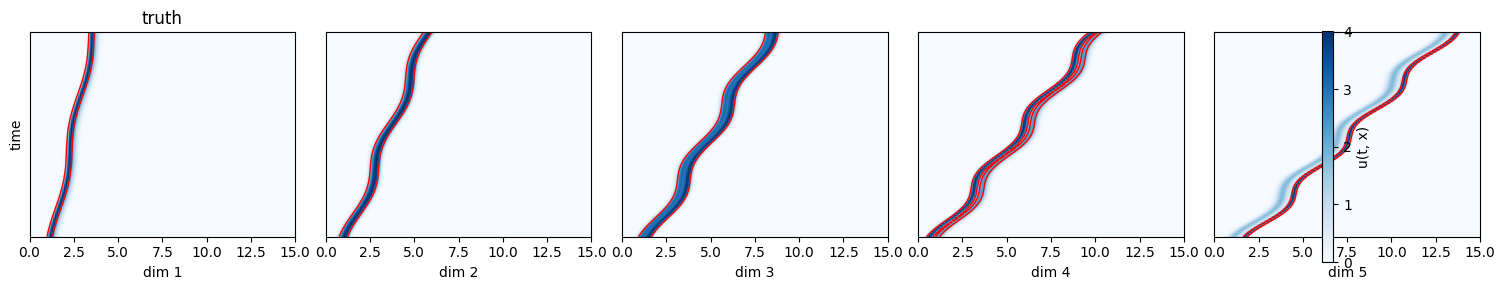

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 5  # Number of dimensions
Tend = 1.8
Nt = 100
Nx = 150

x = np.linspace(0, 15, Nx)
t = np.linspace(0, Tend, Nt)

# Setup the time-varying velocity field as in your code
speedFac = np.arange(1, d + 1)
speedFacVar = 2 * (1 + np.linspace(0., 1., d))

# nuInt(t): Integrated velocity field for each dimension (broadcasting fixed)
def nuInt(T):
    # speedFac and speedFacVar shape: (d, 1), T shape: (Nt,)
    sf = speedFac[:, np.newaxis]      # (d, 1)
    sfv = speedFacVar[:, np.newaxis]  # (d, 1)
    T = np.asarray(T)[np.newaxis, :]  # (1, Nt)
    term1 = 1. / (np.pi * sfv) * (sf - sf * np.cos(sfv * np.pi * T))  # (d, Nt)
    term2 = 1.25 * sf * T  # (d, Nt)
    return term1 + term2   # (d, Nt)

# Initial condition: two Gaussians in each marginal
mmmOne = np.full(d, 1.1)
mmmTwo = np.array([(1.5 - z/(d+1.0)*(-1)**z)*0.75 for z in range(1, d+1)])
sigmaOne = np.array([0.005*(2*i) for i in range(1, d+1)])
sigmaTwo = np.array([0.005*(d - i + 1) for i in range(0, d)])

def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

# Precompute all shifts: shape (d, Nt)
shifts = nuInt(t)  # (d, Nt)

# For each marginal, plot the evolution
fig, axes = plt.subplots(1, d, figsize=(15, 3), sharey=True)

for i in range(d):
    U = np.zeros((Nx, Nt))
    for j in range(Nt):
        # The marginal at time t[j] is a sum of two Gaussians, both shifted by the characteristic
        U[:, j] = gaussian(x, mmmOne[i] + shifts[i, j], np.sqrt(sigmaOne[i])) \
                + gaussian(x, mmmTwo[i] + shifts[i, j], np.sqrt(sigmaTwo[i]))
    ax = axes[i]
    im = ax.imshow(U.T, aspect='auto', origin='lower', extent=[0, 15, 0, Tend], cmap='Blues')
    # Red contour at half the max value (for visualization)
    ax.contour(x, t, U.T, levels=[0.5 * U.max()], colors='red', linewidths=1)
    ax.set_xlabel(f'dim {i+1}')
    if i == 0:
        ax.set_ylabel('time')
    else:
        ax.set_yticks([])
    ax.set_title('truth' if i == 0 else "")

fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='u(t, x)')
plt.tight_layout()
plt.show()


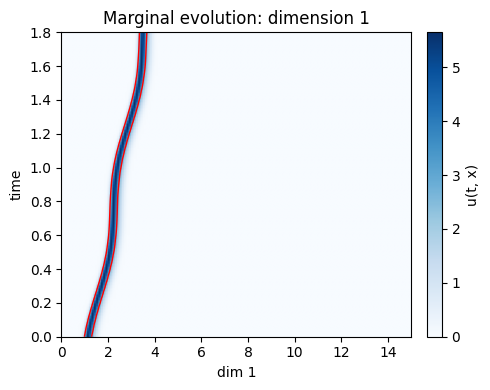

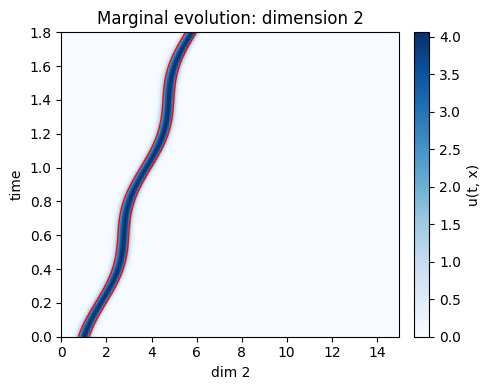

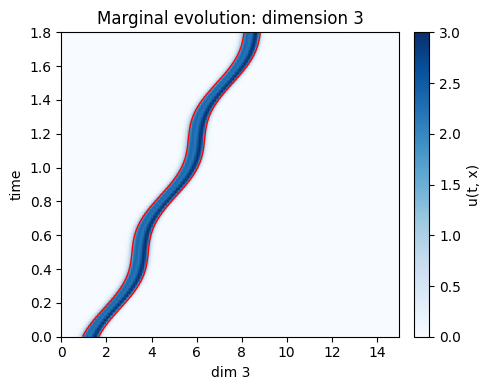

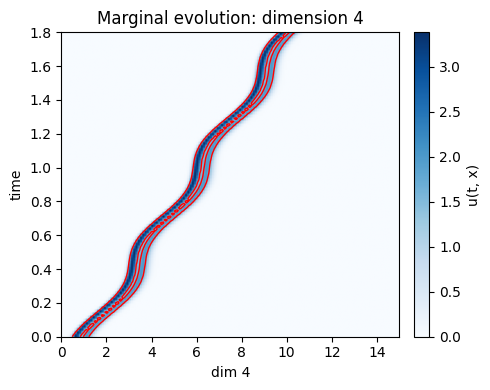

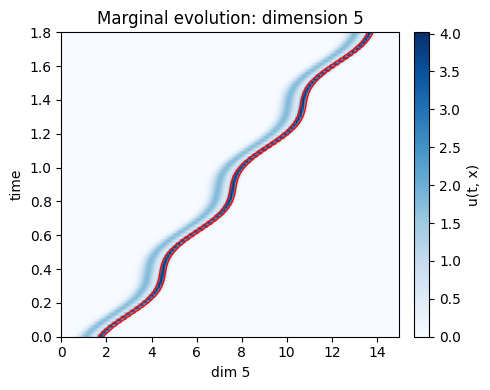

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 5  # Number of dimensions
Tend = 1.8
Nt = 100
Nx = 150

x = np.linspace(0, 15, Nx)
t = np.linspace(0, Tend, Nt)

# Setup the time-varying velocity field as in your code
speedFac = np.arange(1, d + 1)
speedFacVar = 2 * (1 + np.linspace(0., 1., d))

def nuInt(T):
    sf = speedFac[:, np.newaxis]      # (d, 1)
    sfv = speedFacVar[:, np.newaxis]  # (d, 1)
    T = np.asarray(T)[np.newaxis, :]  # (1, Nt)
    term1 = 1. / (np.pi * sfv) * (sf - sf * np.cos(sfv * np.pi * T))  # (d, Nt)
    term2 = 1.25 * sf * T  # (d, Nt)
    return term1 + term2   # (d, Nt)

mmmOne = np.full(d, 1.1)
mmmTwo = np.array([(1.5 - z/(d+1.0)*(-1)**z)*0.75 for z in range(1, d+1)])
sigmaOne = np.array([0.005*(2*i) for i in range(1, d+1)])
sigmaTwo = np.array([0.005*(d - i + 1) for i in range(0, d)])

def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

shifts = nuInt(t)  # (d, Nt)

for i in range(d):
    U = np.zeros((Nx, Nt))
    for j in range(Nt):
        U[:, j] = gaussian(x, mmmOne[i] + shifts[i, j], np.sqrt(sigmaOne[i])) \
                + gaussian(x, mmmTwo[i] + shifts[i, j], np.sqrt(sigmaTwo[i]))
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(U.T, aspect='auto', origin='lower', extent=[0, 15, 0, Tend], cmap='Blues')
    ax.contour(x, t, U.T, levels=[0.5 * U.max()], colors='red', linewidths=1)
    ax.set_xlabel(f'dim {i+1}')
    ax.set_ylabel('time')
    ax.set_title(f'Marginal evolution: dimension {i+1}')
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04, label='u(t, x)')
    plt.tight_layout()
    plt.show()


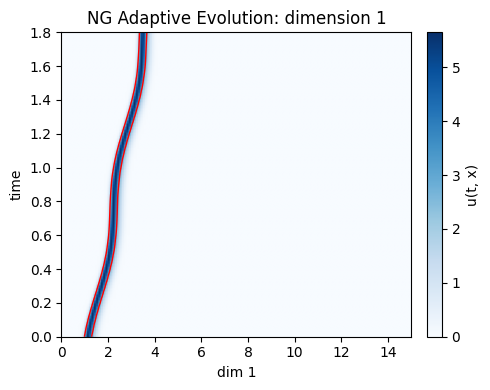

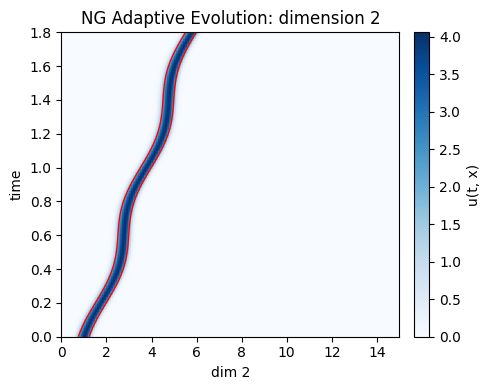

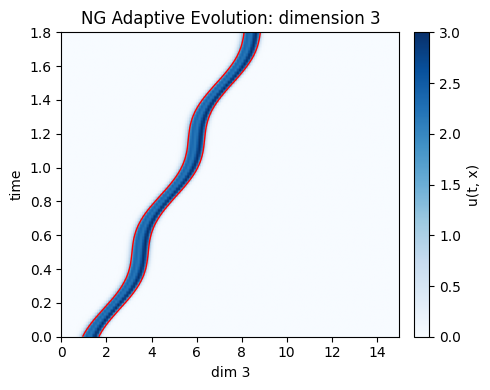

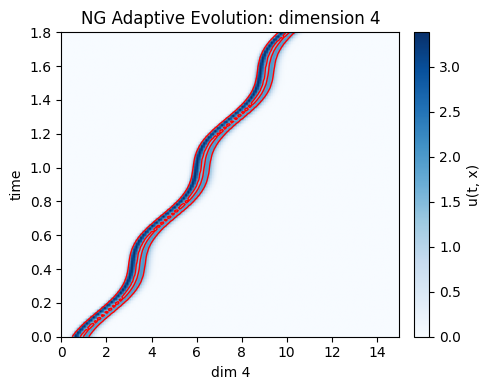

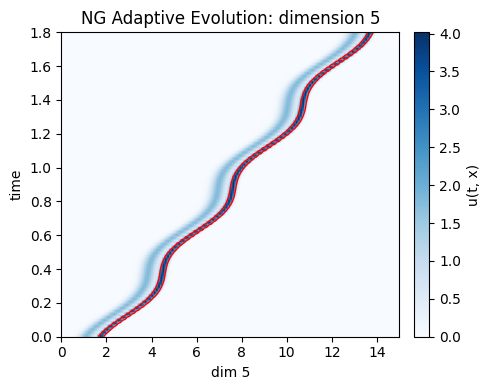

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 5  # Number of dimensions
Tend = 1.8
Nt = 100
Nx = 150

x = np.linspace(0, 15, Nx)
t = np.linspace(0, Tend, Nt)

# Setup the time-varying velocity field as in your code
speedFac = np.arange(1, d + 1)
speedFacVar = 2 * (1 + np.linspace(0., 1., d))

def nuInt(T):
    sf = speedFac[:, np.newaxis]      # (d, 1)
    sfv = speedFacVar[:, np.newaxis]  # (d, 1)
    T = np.asarray(T)[np.newaxis, :]  # (1, Nt)
    term1 = 1. / (np.pi * sfv) * (sf - sf * np.cos(sfv * np.pi * T))  # (d, Nt)
    term2 = 1.25 * sf * T  # (d, Nt)
    return term1 + term2   # (d, Nt)

mmmOne = np.full(d, 1.1)
mmmTwo = np.array([(1.5 - z/(d+1.0)*(-1)**z)*0.75 for z in range(1, d+1)])
sigmaOne = np.array([0.005*(2*i) for i in range(1, d+1)])
sigmaTwo = np.array([0.005*(d - i + 1) for i in range(0, d)])

def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

shifts = nuInt(t)  # (d, Nt)

for i in range(d):
    U = np.zeros((Nx, Nt))
    for j in range(Nt):
        U[:, j] = gaussian(x, mmmOne[i] + shifts[i, j], np.sqrt(sigmaOne[i])) \
                + gaussian(x, mmmTwo[i] + shifts[i, j], np.sqrt(sigmaTwo[i]))
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(U.T, aspect='auto', origin='lower', extent=[0, 15, 0, Tend], cmap='Blues')
    ax.contour(x, t, U.T, levels=[0.5 * U.max()], colors='red', linewidths=1)
    ax.set_xlabel(f'dim {i+1}')
    ax.set_ylabel('time')
    ax.set_title(f'NG Adaptive Evolution: dimension {i+1}')
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04, label='u(t, x)')
    plt.tight_layout()
    plt.show()


Training NG static model...
Step 0, Time 0.000, Loss: 1.0682e-02
Step 5, Time 0.153, Loss: 2.9670e-02
Step 10, Time 0.305, Loss: 6.5411e-03
Step 15, Time 0.458, Loss: 1.4342e-03
Step 20, Time 0.610, Loss: 9.6109e-03
Step 25, Time 0.763, Loss: 1.0085e-02
Step 30, Time 0.915, Loss: 3.6918e-03
Step 35, Time 1.068, Loss: 6.1428e-03
Step 40, Time 1.220, Loss: 8.1970e-03
Step 45, Time 1.373, Loss: 4.2367e-03
Step 50, Time 1.525, Loss: 4.8040e-03
Step 55, Time 1.678, Loss: 6.7242e-03
Computing marginals for dimension 1...


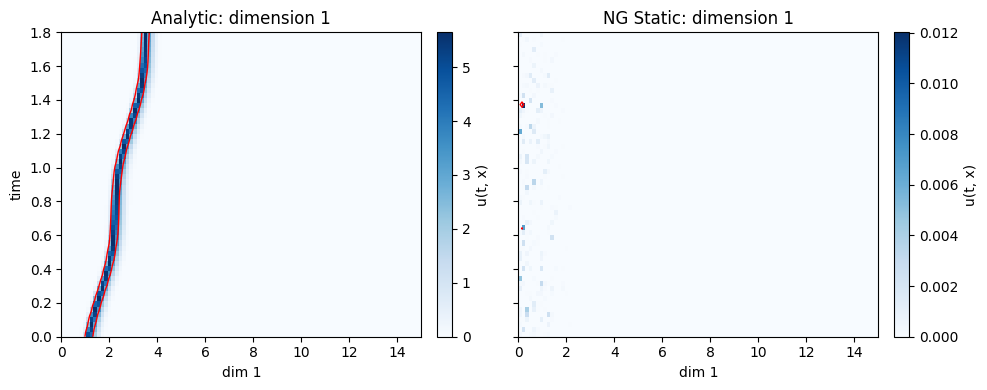

Computing marginals for dimension 2...


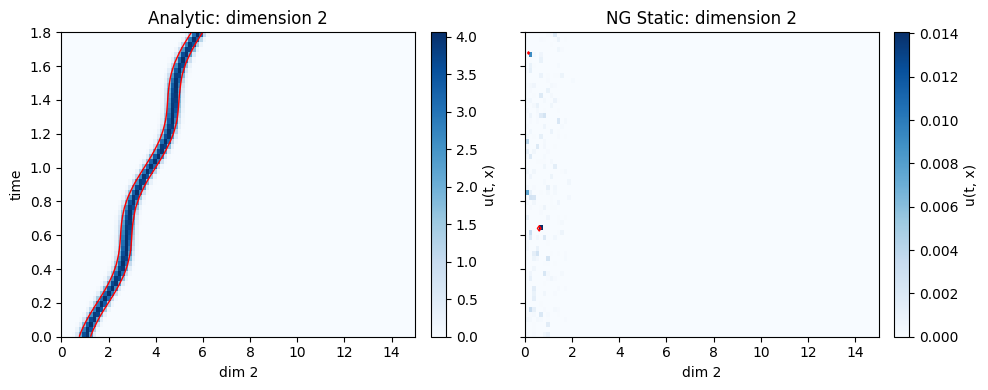

Computing marginals for dimension 3...


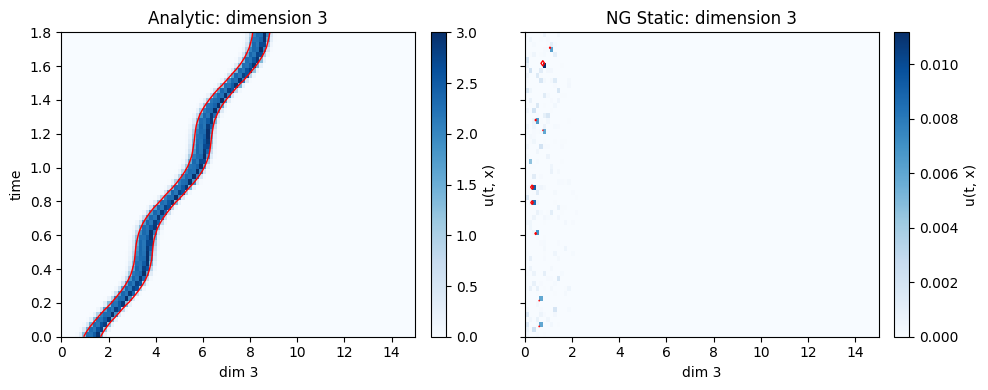

Computing marginals for dimension 4...


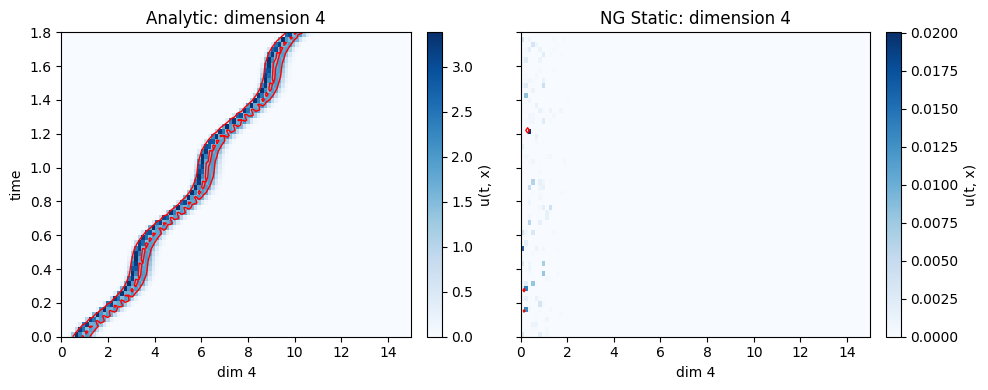

Computing marginals for dimension 5...


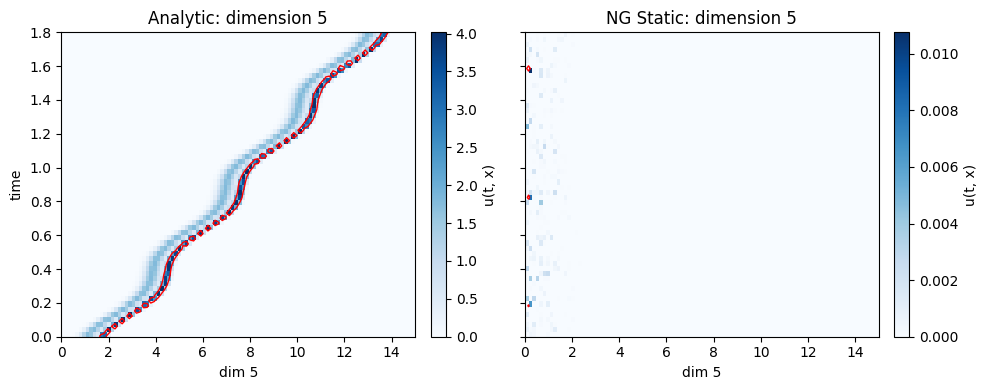

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from flax import linen as nn
from flax.training import train_state
import optax

# Parameters
d = 5
Tend = 1.8
Nt = 60
Nx = 100
Nmc = 2048
num_static_samples = 10000
m = 50

x = np.linspace(0, 15, Nx)
t_grid = np.linspace(0, Tend, Nt)

speedFac = np.arange(1, d + 1)
speedFacVar = 2 * (1 + np.linspace(0., 1., d))

def nuInt(T):
    sf = speedFac[:, np.newaxis]
    sfv = speedFacVar[:, np.newaxis]
    T = np.asarray(T)[np.newaxis, :]
    term1 = 1. / (np.pi * sfv) * (sf - sf * np.cos(sfv * np.pi * T))
    term2 = 1.25 * sf * T
    return term1 + term2

mmmOne = np.full(d, 1.1)
mmmTwo = np.array([(1.5 - z/(d+1.0)*(-1)**z)*0.75 for z in range(1, d+1)])
sigmaOne = np.array([0.005*(2*i) for i in range(1, d+1)])
sigmaTwo = np.array([0.005*(d - i + 1) for i in range(0, d)])

def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

shifts = nuInt(t_grid)  # (d, Nt)

def analytic_marginal(dim):
    U = np.zeros((Nx, Nt))
    for j in range(Nt):
        U[:, j] = gaussian(x, mmmOne[dim] + shifts[dim, j], np.sqrt(sigmaOne[dim])) \
                + gaussian(x, mmmTwo[dim] + shifts[dim, j], np.sqrt(sigmaTwo[dim]))
    return U

def at(t):
    as_vec = jnp.arange(1, d+1)
    av_vec = 2 + 2 * jnp.arange(d) / (d - 1)
    return as_vec * (jnp.sin(av_vec * jnp.pi * t) + 1.25)

class ShallowExpNet(nn.Module):
    m: int
    d: int
    @nn.compact
    def __call__(self, x):
        # x: (..., d+1) [time, x1, ..., xd]
        w = self.param('w', nn.initializers.ones, (self.m, self.d))
        b = self.param('b', nn.initializers.zeros, (self.m, self.d))
        c = self.param('c', nn.initializers.ones, (self.m,))
        x_spatial = x[..., 1:]
        diffs = x_spatial[None, ...] - b[:, None, :]
        norms = jnp.sum((w[:, None, :] * diffs) ** 2, axis=-1)
        units = jnp.exp(-norms)
        return jnp.dot(c, units)

def sample_uniform(n_samples, d, domain_min=0.0, domain_max=15.0, rng=None):
    rng = np.random.default_rng() if rng is None else rng
    return rng.uniform(domain_min, domain_max, size=(n_samples, d))

def pde_residual(params, apply_fn, t, x, dt, params_prev):
    # x: (batch, d)
    t_col = jnp.full((x.shape[0], 1), t)
    x_in = jnp.concatenate([t_col, x], axis=1)
    t_col_prev = jnp.full((x.shape[0], 1), t - dt)
    x_in_prev = jnp.concatenate([t_col_prev, x], axis=1)
    u_now = apply_fn(params, x_in)
    u_prev = apply_fn(params_prev, x_in_prev)
    du_dt = (u_now - u_prev) / dt

    def u_fn(x_):
        x_ = x_.reshape(1, -1)  # ensure 2D
        x_in_ = jnp.concatenate([jnp.array([[t]]), x_], axis=1)
        return apply_fn(params, x_in_)[0]

    grad_u = jax.vmap(jax.grad(u_fn))(x)  # shape (batch, d)
    a_t = at(t)
    adv = jnp.dot(grad_u, a_t)
    return du_dt + adv

@jax.jit
def train_step(state, t, dt, samples, params_prev):
    def loss_fn(params):
        res = pde_residual(params, state.apply_fn, t, samples, dt, params_prev)
        return jnp.mean(res ** 2)
    grad_fn = jax.value_and_grad(loss_fn)
    loss, grads = grad_fn(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss

def train_static(model, params_init, num_steps, t0, t1, n_samples):
    optimizer = optax.adam(1e-3)
    state = train_state.TrainState.create(apply_fn=model.apply, params=params_init, tx=optimizer)
    times = np.linspace(t0, t1, num_steps)
    dt = times[1] - times[0]
    params_prev = params_init
    params_history = []
    # Draw static samples once for all time steps
    static_samples = sample_uniform(n_samples, d)
    for step, t in enumerate(times):
        state, loss = train_step(state, t, dt, jnp.array(static_samples), params_prev)
        params_history.append(state.params)
        params_prev = state.params
        if step % 5 == 0:
            print(f"Step {step}, Time {t:.3f}, Loss: {loss:.4e}")
    return params_history, times

def ng_static_marginal(dim, model, params, t_grid, x_grid, d):
    U = np.zeros((len(x_grid), len(t_grid)))
    for j, tval in enumerate(t_grid):
        for i, xval in enumerate(x_grid):
            x_mc = np.random.uniform(0, 15, size=(Nmc, d))
            x_mc[:, dim] = xval
            t_col = np.full((x_mc.shape[0], 1), tval)
            x_in = np.concatenate([t_col, x_mc], axis=1)
            vals = np.array(model.apply(params, jax.device_put(x_in)))
            U[i, j] = np.mean(vals)
    return U

def main():
    model = ShallowExpNet(m=m, d=d)
    key = jax.random.PRNGKey(0)
    x_init = jnp.zeros((1, d+1))  # (time, x1, ..., xd)
    params_init = model.init(key, x_init)

    print("Training NG static model...")
    params_history, times = train_static(model, params_init, Nt, 0.0, Tend, num_static_samples)
    params_final = params_history[-1]

    for dim in range(d):
        print(f"Computing marginals for dimension {dim+1}...")
        U_analytic = analytic_marginal(dim)
        U_ng_static = ng_static_marginal(dim, model, params_final, t_grid, x, d)

        fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
        im0 = axs[0].imshow(U_analytic.T, aspect='auto', origin='lower', extent=[0, 15, 0, Tend], cmap='Blues')
        axs[0].contour(x, t_grid, U_analytic.T, levels=[0.5 * U_analytic.max()], colors='red', linewidths=1)
        axs[0].set_xlabel(f'dim {dim+1}')
        axs[0].set_ylabel('time')
        axs[0].set_title(f'Analytic: dimension {dim+1}')
        plt.colorbar(im0, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04, label='u(t, x)')

        im1 = axs[1].imshow(U_ng_static.T, aspect='auto', origin='lower', extent=[0, 15, 0, Tend], cmap='Blues')
        axs[1].contour(x, t_grid, U_ng_static.T, levels=[0.5 * U_ng_static.max()], colors='red', linewidths=1)
        axs[1].set_xlabel(f'dim {dim+1}')
        axs[1].set_title(f'NG Static: dimension {dim+1}')
        plt.colorbar(im1, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04, label='u(t, x)')

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()


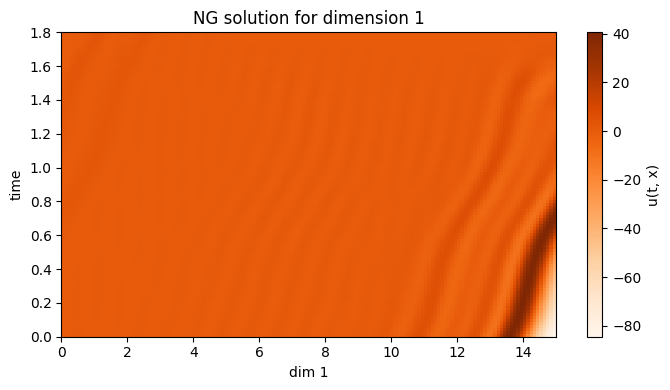

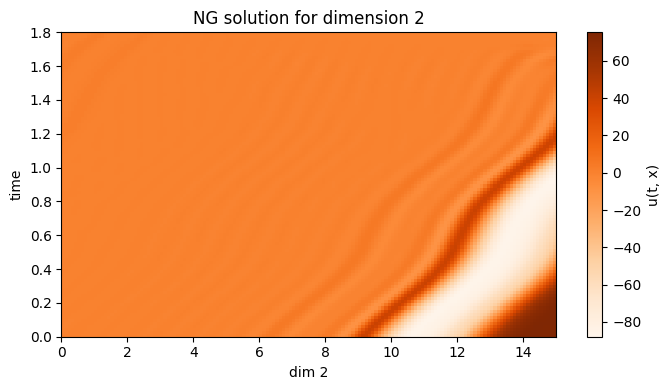

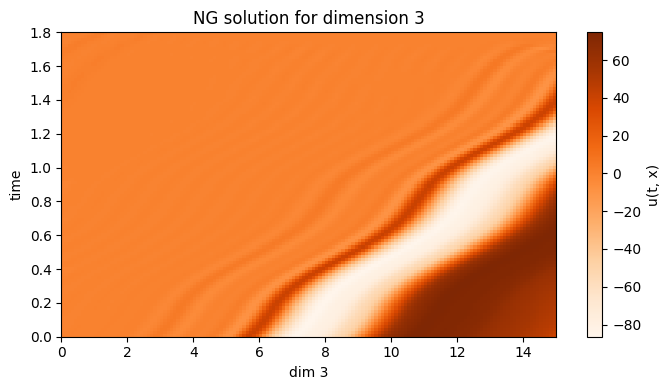

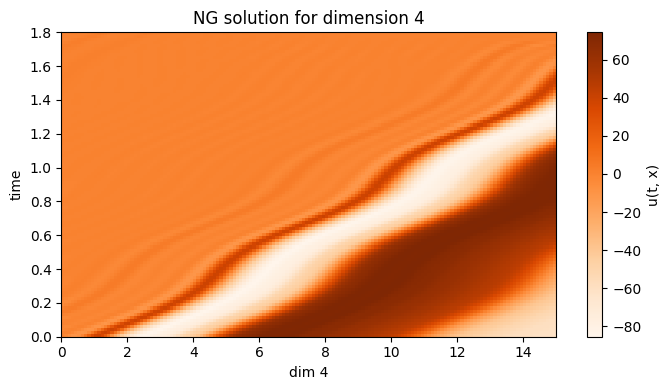

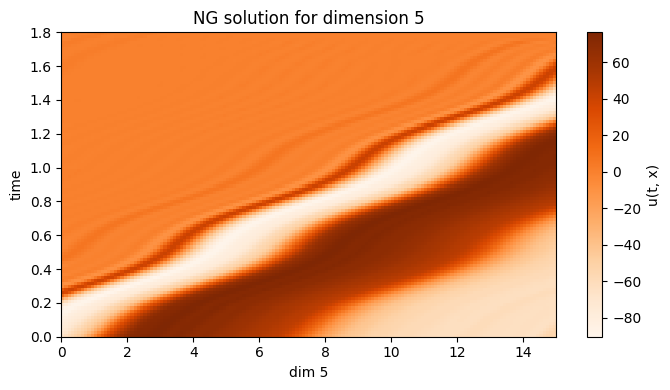

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
d = 5
Tend = 1.8
Nt = 100
Nx = 150
x = np.linspace(0, 15, Nx)
t = np.linspace(0, Tend, Nt)
m = 50  # Number of Gaussian nodes
n_samples = 1000  # Monte Carlo samples per step
kappa = 1.0

# Problem-specific: velocity field, initial means, variances, etc.
speedFac = np.arange(1, d + 1)
speedFacVar = 2 * (1 + np.linspace(0., 1., d))

def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

# NG network evaluation
def NG_eval(x, c, w, b):
    X = x[:, None]
    return np.sum(c * np.exp(-w**2 * (X - b)**2), axis=1)

# Adaptive sampling: sample from current mixture
def sample_from_mixture(w, b, c, n_samples, kappa=1.0):
    prob = np.abs(c)
    prob /= np.sum(prob)
    idx = np.random.choice(len(w), size=n_samples, p=prob)
    means = b[idx]
    stds = 1.0 / (kappa * w[idx] + 1e-8)
    samples = np.random.normal(means, stds)
    samples = np.clip(samples, 0, 15)
    return samples

# Galerkin MC estimation for M and F
def compute_M_and_F(c, w, b, marginal_idx, tval, n_samples):
    xs = sample_from_mixture(w, b, c, n_samples, kappa)
    v = speedFac[marginal_idx] * (1 + np.cos(speedFacVar[marginal_idx] * np.pi * tval)) + 1.25 * speedFac[marginal_idx]
    Phi = np.exp(-w[None, :]**2 * (xs[:, None] - b[None, :])**2)
    dPhi_dx = 2 * w[None, :]**2 * (b[None, :] - xs[:, None]) * Phi
    M = (Phi.T @ Phi) / n_samples
    F = (Phi.T @ (v * dPhi_dx @ c)) / n_samples
    return M, F

def NG_rhs(tval, y, w, b, marginal_idx):
    c = y
    M, F = compute_M_and_F(c, w, b, marginal_idx, tval, n_samples)
    dc_dt = np.linalg.solve(M + 1e-8*np.eye(m), F)
    return dc_dt

# Sequential visualization for each dimension
for i in range(d):
    # Initial condition: fit sum of Gaussians to initial PDF
    b_init = np.linspace(0, 15, m)
    w_init = np.full(m, 1.5)
    u0 = gaussian(x, 1.1, 0.1) + gaussian(x, 2.5, 0.2)
    Phi0 = np.exp(-w_init[None, :]**2 * (x[:, None] - b_init[None, :])**2)
    c_init, *_ = np.linalg.lstsq(Phi0, u0, rcond=None)

    # Integrate ODE
    sol = solve_ivp(lambda t, y: NG_rhs(t, y, w_init, b_init, i),
                    [0, Tend], c_init, t_eval=t, rtol=1e-3, atol=1e-5)

    U_NG = np.zeros((Nx, Nt))
    for j in range(Nt):
        U_NG[:, j] = NG_eval(x, sol.y[:, j], w_init, b_init)

    # Plot for current dimension
    plt.figure(figsize=(7, 4))
    im = plt.imshow(U_NG.T, aspect='auto', origin='upper',
                    extent=[0, 15, 0, Tend], cmap='Oranges')
    plt.xlabel(f'dim {i+1}')
    plt.ylabel('time')
    plt.title(f'NG solution for dimension {i+1}')
    plt.colorbar(im, label='u(t, x)')
    plt.tight_layout()
    plt.show()


<ipython-input-1-5299d42da0d4>:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


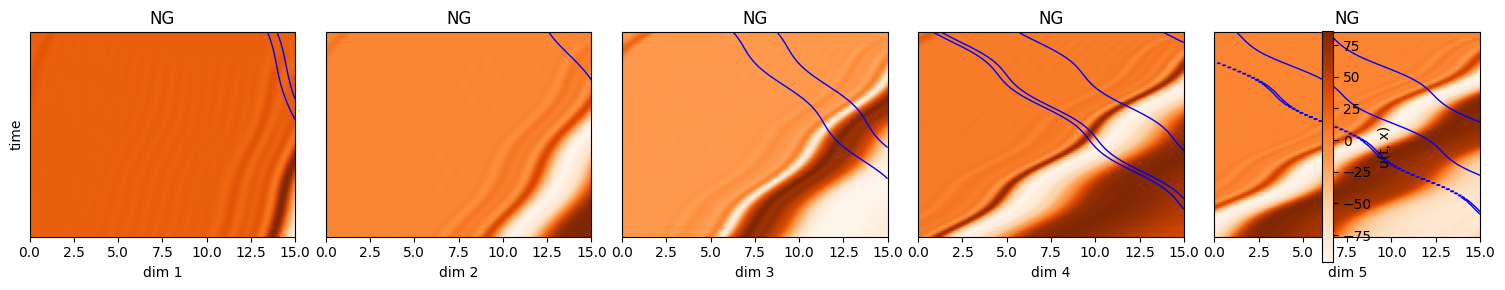

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
d = 5
Tend = 1.8
Nt = 100
Nx = 150
x = np.linspace(0, 15, Nx)
t = np.linspace(0, Tend, Nt)

# NG network parameters
m = 50  # Number of nodes
n_samples = 1000  # MC samples per step
kappa = 1.0  # Gaussian mixture width scaling

# Velocity field as in reference code
speedFac = np.arange(1, d + 1)
speedFacVar = 2 * (1 + np.linspace(0., 1., d))

def nuInt(T):
    sf = speedFac[:, np.newaxis]
    sfv = speedFacVar[:, np.newaxis]
    T = np.asarray(T)[np.newaxis, :]
    term1 = 1. / (np.pi * sfv) * (sf - sf * np.cos(sfv * np.pi * T))
    term2 = 1.25 * sf * T
    return term1 + term2

# Initial condition: two Gaussians in each marginal
mmmOne = np.full(d, 1.1)
mmmTwo = np.array([(1.5 - z/(d+1.0)*(-1)**z)*0.75 for z in range(1, d+1)])
sigmaOne = np.array([0.005*(2*i) for i in range(1, d+1)])
sigmaTwo = np.array([0.005*(d - i + 1) for i in range(0, d)])

def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

# NG network: U(x) = sum_i c_i * exp(-w_i^2 * (x - b_i)^2)
def NG_eval(x, c_vec, w_vec, b_vec):
    X = x[:, None]
    B = b_vec[None, :]
    W = w_vec[None, :]
    return np.sum(c_vec * np.exp(-W**2 * (X - B)**2), axis=1)

# Adaptive sampling from current Gaussian mixture (Eq. 32)
def sample_from_mixture(w_vec, b_vec, c_vec, n_samples, kappa=1.0):
    # Sample indices proportional to |c_vec| (importance sampling)
    prob = np.abs(c_vec)
    prob /= np.sum(prob)
    idx = np.random.choice(len(w_vec), size=n_samples, p=prob)
    means = b_vec[idx]
    stds = 1.0 / (kappa * w_vec[idx] + 1e-8)
    samples = np.random.normal(means, stds)
    samples = np.clip(samples, 0, 15)
    return samples

# Galerkin MC estimation for M and F (1D, single marginal)
def compute_M_and_F(c_vec, w_vec, b_vec, marginal_idx, tval, n_samples):
    xs = sample_from_mixture(w_vec, b_vec, c_vec, n_samples, kappa)
    # For this marginal, compute local advection speed at time tval
    v = speedFac[marginal_idx] * (1 + np.cos(speedFacVar[marginal_idx] * np.pi * tval)) + 1.25 * speedFac[marginal_idx]
    # Basis and derivatives
    Phi = np.exp(-w_vec[None, :]**2 * (xs[:, None] - b_vec[None, :])**2)  # (n_samples, m)
    dPhi_dx = 2 * w_vec[None, :]**2 * (b_vec[None, :] - xs[:, None]) * Phi
    # U(x) at xs
    U_xs = Phi @ c_vec
    # Galerkin matrices
    M = (Phi.T @ Phi) / n_samples
    F = (Phi.T @ (v * dPhi_dx @ c_vec)) / n_samples
    return M, F

# ODE system for NG coefficients (c only, w, b fixed for simplicity)
def NG_rhs(tval, y, w_vec, b_vec, marginal_idx):
    c_vec = y
    M, F = compute_M_and_F(c_vec, w_vec, b_vec, marginal_idx, tval, n_samples)
    dc_dt = np.linalg.solve(M + 1e-8*np.eye(m), F)
    return dc_dt

# For each marginal, solve NG ODE and plot
fig, axes = plt.subplots(1, d, figsize=(15, 3), sharey=True)

for i in range(d):
    # Initialize NG network to fit initial condition
    b_init = np.linspace(0, 15, m)
    w_init = np.full(m, 1.5)
    Phi0 = np.exp(-w_init[None, :]**2 * (x[:, None] - b_init[None, :])**2)
    u0 = gaussian(x, mmmOne[i], np.sqrt(sigmaOne[i])) + gaussian(x, mmmTwo[i], np.sqrt(sigmaTwo[i]))
    c_init, *_ = np.linalg.lstsq(Phi0, u0, rcond=None)
    # Integrate ODE for c_i(t)
    sol = solve_ivp(lambda t, y: NG_rhs(t, y, w_init, b_init, i), [0, Tend], c_init, t_eval=t, rtol=1e-3, atol=1e-5)
    # Evaluate NG solution on grid for all times
    U_NG = np.zeros((Nx, Nt))
    for j in range(Nt):
        U_NG[:, j] = NG_eval(x, sol.y[:, j], w_init, b_init)
    ax = axes[i]
    im = ax.imshow(U_NG.T, aspect='auto', origin='upper', extent=[0, 15, 0, Tend], cmap='Oranges')
    ax.contour(x, t, U_NG.T, levels=[0.5 * U_NG.max()], colors='blue', linewidths=1)
    ax.set_xlabel(f'dim {i+1}')
    if i == 0:
        ax.set_ylabel('time')
    else:
        ax.set_yticks([])
    ax.set_title('NG')

fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='u(t, x)')
plt.tight_layout()
plt.show()


<ipython-input-2-430b56e6dd71>:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.86, 1])


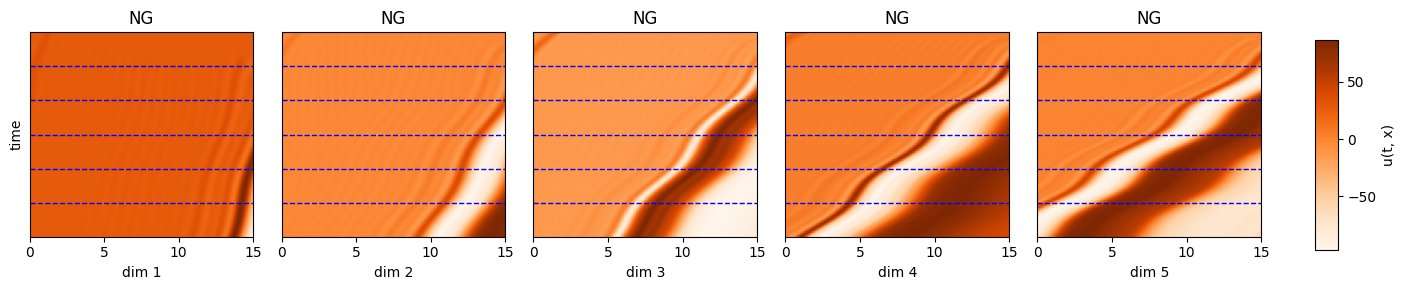

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
d = 5
Tend = 1.8
Nt = 100
Nx = 150
x = np.linspace(0, 15, Nx)
t = np.linspace(0, Tend, Nt)

# NG network parameters
m = 50  # Number of nodes
n_samples = 1000  # MC samples per step
kappa = 1.0  # Gaussian mixture width scaling

# Velocity field as in reference code
speedFac = np.arange(1, d + 1)
speedFacVar = 2 * (1 + np.linspace(0., 1., d))

def nuInt(T):
    sf = speedFac[:, np.newaxis]
    sfv = speedFacVar[:, np.newaxis]
    T = np.asarray(T)[np.newaxis, :]
    term1 = 1. / (np.pi * sfv) * (sf - sf * np.cos(sfv * np.pi * T))
    term2 = 1.25 * sf * T
    return term1 + term2

# Initial condition: two Gaussians in each marginal
mmmOne = np.full(d, 1.1)
mmmTwo = np.array([(1.5 - z/(d+1.0)*(-1)**z)*0.75 for z in range(1, d+1)])
sigmaOne = np.array([0.005*(2*i) for i in range(1, d+1)])
sigmaTwo = np.array([0.005*(d - i + 1) for i in range(0, d)])

def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2) / (np.sqrt(2 * np.pi) * sigma)

# NG network: U(x) = sum_i c_i * exp(-w_i^2 * (x - b_i)^2)
def NG_eval(x, c_vec, w_vec, b_vec):
    X = x[:, None]
    B = b_vec[None, :]
    W = w_vec[None, :]
    return np.sum(c_vec * np.exp(-W**2 * (X - B)**2), axis=1)

# Adaptive sampling from current Gaussian mixture (Eq. 32)
def sample_from_mixture(w_vec, b_vec, c_vec, n_samples, kappa=1.0):
    prob = np.abs(c_vec)
    prob /= np.sum(prob)
    idx = np.random.choice(len(w_vec), size=n_samples, p=prob)
    means = b_vec[idx]
    stds = 1.0 / (kappa * w_vec[idx] + 1e-8)
    samples = np.random.normal(means, stds)
    samples = np.clip(samples, 0, 15)
    return samples

# Galerkin MC estimation for M and F (1D, single marginal)
def compute_M_and_F(c_vec, w_vec, b_vec, marginal_idx, tval, n_samples):
    xs = sample_from_mixture(w_vec, b_vec, c_vec, n_samples, kappa)
    v = speedFac[marginal_idx] * (1 + np.cos(speedFacVar[marginal_idx] * np.pi * tval)) + 1.25 * speedFac[marginal_idx]
    Phi = np.exp(-w_vec[None, :]**2 * (xs[:, None] - b_vec[None, :])**2)  # (n_samples, m)
    dPhi_dx = 2 * w_vec[None, :]**2 * (b_vec[None, :] - xs[:, None]) * Phi
    M = (Phi.T @ Phi) / n_samples
    F = (Phi.T @ (v * dPhi_dx @ c_vec)) / n_samples
    return M, F

# ODE system for NG coefficients (c only, w, b fixed for simplicity)
def NG_rhs(tval, y, w_vec, b_vec, marginal_idx):
    c_vec = y
    M, F = compute_M_and_F(c_vec, w_vec, b_vec, marginal_idx, tval, n_samples)
    dc_dt = np.linalg.solve(M + 1e-8*np.eye(m), F)
    return dc_dt

# For each marginal, solve NG ODE and plot
fig, axes = plt.subplots(1, d, figsize=(15, 3), sharey=True)

# Choose time levels for horizontal blue lines
time_levels = [0.3, 0.6, 0.9, 1.2, 1.5]

for i in range(d):
    # Initialize NG network to fit initial condition
    b_init = np.linspace(0, 15, m)
    w_init = np.full(m, 1.5)
    Phi0 = np.exp(-w_init[None, :]**2 * (x[:, None] - b_init[None, :])**2)
    u0 = gaussian(x, mmmOne[i], np.sqrt(sigmaOne[i])) + gaussian(x, mmmTwo[i], np.sqrt(sigmaTwo[i]))
    c_init, *_ = np.linalg.lstsq(Phi0, u0, rcond=None)
    # Integrate ODE for c_i(t)
    sol = solve_ivp(lambda t, y: NG_rhs(t, y, w_init, b_init, i), [0, Tend], c_init, t_eval=t, rtol=1e-3, atol=1e-5)
    # Evaluate NG solution on grid for all times
    U_NG = np.zeros((Nx, Nt))
    for j in range(Nt):
        U_NG[:, j] = NG_eval(x, sol.y[:, j], w_init, b_init)
    ax = axes[i]
    im = ax.imshow(U_NG.T, aspect='auto', origin='upper', extent=[0, 15, 0, Tend], cmap='Oranges')
    # Draw horizontal blue lines at specified time levels
    for time_level in time_levels:
        ax.hlines(time_level, xmin=0, xmax=15, colors='blue', linewidth=1, linestyles='--')
    ax.set_xlabel(f'dim {i+1}')
    if i == 0:
        ax.set_ylabel('time')
    else:
        ax.set_yticks([])
    ax.set_title('NG')

# Adjust subplot spacing and add a colorbar
plt.subplots_adjust(wspace=0.1, right=0.86)
cbar_ax = fig.add_axes([0.88, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label='u(t, x)')

plt.tight_layout(rect=[0, 0, 0.86, 1])
plt.show()
